# 4G Anomaly Detection Classifier

#### Introduction:
* The purpose of this homework is to solve a classification problem proposed as a competition in the Kaggle InClass platform, where each team of two members will try to get the maximum score. You can apply any of the concepts and techniques studied in class for exploratory data analysis, feature selection and classification.

#### Problem Description:
* Context: Traditionally, the design of a cellular network focuses on the optimization of energy and resources that guarantees a smooth operation even during peak hours (i.e. periods with higher traffic load). 
* However, this implies that cells are most of the time overprovisioned of radio resources. 
* Next generation cellular networks ask for a dynamic management and configuration in order to adapt to the varying user demands in the most efficient way with regards to energy savings and utilization of frequency resources.
* If the network operator were capable of anticipating to those variations in the users’ traffic demands, a more efficient management of the scarce (and expensive) network resources would be possible. 
* Current research in mobile networks looks upon Machine Learning (ML) techniques to help manage those resources. In this case, you will explore the possibilities of ML to detect abnormal behaviors in the utilization of the network that would motivate a change in the configuration of the base station.

#### Goal:
* The objective of the network optimization team is to analyze traces of past activity, which will be used to train an ML system capable of classifying samples of current activity as:
 > **0 (normal)**: current activity corresponds to normal behavior of any working day and. Therefore, no re-configuration or redistribution of resources is needed.

 > **1 (unusual)**: current activity slightly differs from the behavior usually observed for that time of the day (e.g. due to a strike, demonstration, sports event, etc.), which should trigger a reconfiguration of the base station. 

Content: The dataset has been obtained from a real LTE deployment. During two weeks, different metrics were gathered from a set of 10 base stations, each having a different number of cells, every 15 minutes. The dataset is provided in the form of a csv file, where each row corresponds to a sample obtained from one particular cell at a certain time. 

##### Each data example contains the following features:
* **Time** : hour of the day (in the format hh:mm) when the sample was generated.
* **CellName1**: text string used to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station (see the example in the right figure). 
* **PRBUsageUL** and **PRBUsageDL**: level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
* **meanThr_DL** and **meanThr_UL**: average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately. 
* **maxThr_DL** and **maxThr_UL**: maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
* **meanUE_DL** and **meanUE_UL**: average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately. 
* **maxUE_DL** and **maxUE_UL**: maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
* **maxUE_UL+DL**: maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.
*  **Unusual**: labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior.

### Step 1: Importing the initial relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for data plotting
import seaborn as sns #for data plotting

### Step 2: Loading the train file

In [2]:
train_file = pd.read_csv('ML-MATT-CompetitionQT2021_train.csv', delimiter=";")
train_file.head(5)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0


### Step 3: Explore the Dataset and Preprocessing

In [3]:
train_file.describe(include='all')

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
count,36904,36904,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000
unique,96,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12:00,5ALTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,1157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.897706,2.124434,0.565398,0.068173,17.926552,1.808755,1.184777,0.671641,4.320345,3.124648,7.444992,0.275932
std,NaN,NaN,8.472748,2.261744,0.733322,0.187839,15.870278,5.078689,0.213374,0.540480,1.785513,1.402753,3.051653,0.446989
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.213000,0.707000,0.142000,0.021800,5.770650,0.366850,1.052000,0.010000,3.000000,2.000000,5.000000,0.000000
50%,NaN,NaN,4.547000,1.379150,0.356000,0.040000,14.304000,0.711000,1.132000,1.011000,4.000000,3.000000,7.000000,0.000000
75%,NaN,NaN,12.328000,2.826900,0.725000,0.075000,25.291750,1.252100,1.273000,1.068700,5.000000,4.000000,9.000000,1.000000


#### Note: 
* We notice that the count got a consistent number. This file contains almost clean data set.We can further prove below by checking the null values.
* Time component have 96 samples recorded. (24hr x 60min)/15mins = 96 instances
* CellName have 33 unique samples. 10 Base Stations with 3 different LTE Technology each.

In [4]:
train_file.CellName.unique()

array(['3BLTE', '1BLTE', '9BLTE', '4ALTE', '10BLTE', '9ALTE', '4BLTE',
       '4CLTE', '6CLTE', '5CLTE', '7BLTE', '8CLTE', '7ULTE', '6WLTE',
       '7VLTE', '7WLTE', '5ALTE', '6ALTE', '6ULTE', '3CLTE', '5BLTE',
       '8ALTE', '8BLTE', '6BLTE', '10CLTE', '7CLTE', '3ALTE', '1CLTE',
       '2ALTE', '10ALTE', '1ALTE', '6VLTE', '7ALTE'], dtype=object)

Let's split up the Base Station Number and Cell ID.

In [5]:
import re
Cell_Name = train_file['CellName']

#Extracting the Base Station Number and Cell ID
BSN = [int(re.search(r'\d+', name).group()) for name in Cell_Name]
Cell_ID = [re.search(r'[A-Za-z]', name).group() for name in Cell_Name]

# Inserting a new extracted data from the train_file dataframe
train_file.insert(2, 'Base_Stn_No', BSN) #Insert at 2nd Column beside of CellName
train_file.insert(3, 'Cell_ID', Cell_ID) #Insert at 3rd Column beside of BSN

In [6]:
train_file.Base_Stn_No.unique() # 10 unique Base Stations

array([ 3,  1,  9,  4, 10,  6,  5,  7,  8,  2], dtype=int64)

In [7]:
train_file.Cell_ID.unique() # 6 unique Cell_ID

array(['B', 'A', 'C', 'U', 'W', 'V'], dtype=object)

#### Check the whole content of the data if there is any missing values

In [8]:
train_file.isnull().sum()

Time           0
CellName       0
Base_Stn_No    0
Cell_ID        0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
dtype: int64

The train data set is clean,   therefore we can proceed with Exploratory Data Analysis.

In [10]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   Base_Stn_No  36904 non-null  int64  
 3   Cell_ID      36904 non-null  object 
 4   PRBUsageUL   36904 non-null  float64
 5   PRBUsageDL   36904 non-null  float64
 6   meanThr_DL   36904 non-null  float64
 7   meanThr_UL   36904 non-null  float64
 8   maxThr_DL    36904 non-null  float64
 9   maxThr_UL    36904 non-null  float64
 10  meanUE_DL    36904 non-null  float64
 11  meanUE_UL    36904 non-null  float64
 12  maxUE_DL     36904 non-null  int64  
 13  maxUE_UL     36904 non-null  int64  
 14  maxUE_UL+DL  36904 non-null  int64  
 15  Unusual      36904 non-null  int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 4.5+ MB


#### Plotting of Cell ID Distribution

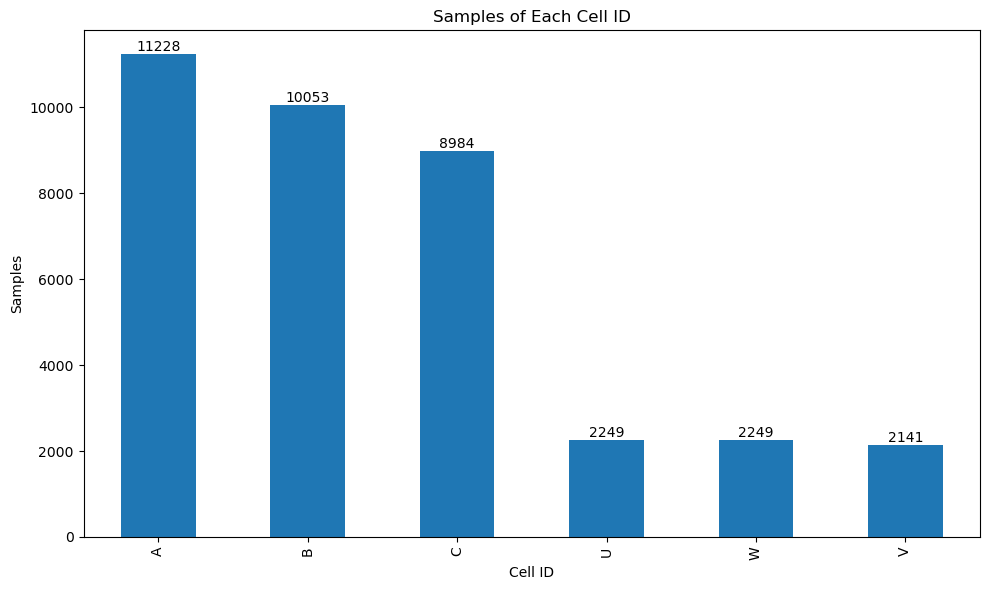

In [11]:
Cell_ID_Plot = train_file['Cell_ID'].value_counts()
# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = Cell_ID_Plot.plot(kind='bar')

# Adding labels and title
plt.xlabel('Cell ID')
plt.ylabel('Samples')
plt.title('Samples of Each Cell ID')

# Adding value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

**Observation:**
> LTE-A, LTE-B and LTE-C got the most sampling observed. We will further explore the sampling observed on each cell that contains within the Base Station Controller. We assume that this Cell IDs are deployed within a given cluster.

##### Plotting of Base Station Number Distribution

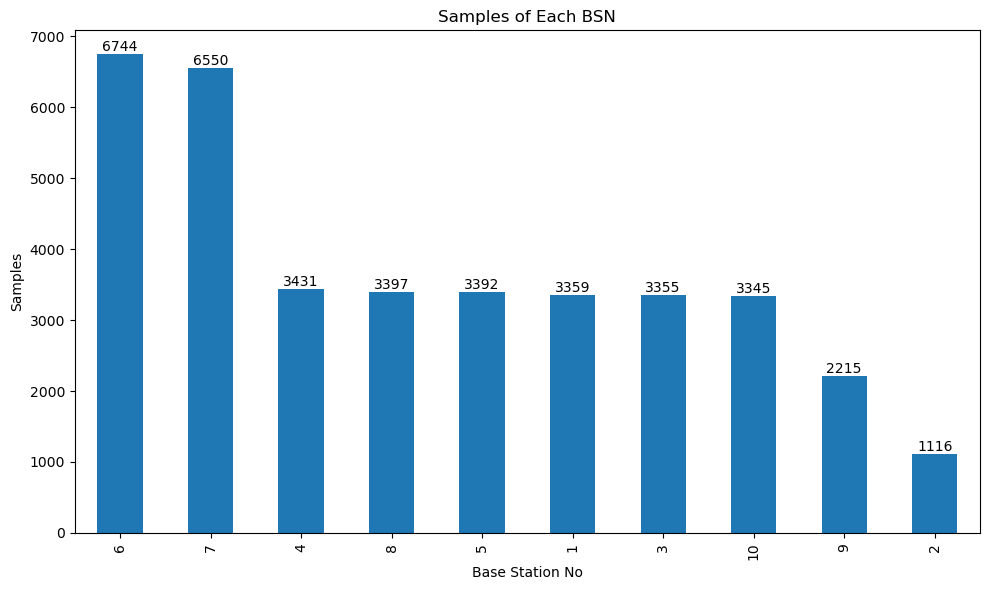

In [12]:
BSN_Plot = train_file['Base_Stn_No'].value_counts()
# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_bsn = BSN_Plot.plot(kind='bar')

# Adding labels and title
plt.xlabel('Base Station No')
plt.ylabel('Samples')
plt.title('Samples of Each BSN')

# Adding value labels on top of each bar
for bar in bar_bsn.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

**Observation:**
> Base Station 6 and 7 got the highest frequency of observation. Let's explore further its unusual behaviour.

#### Plotting of Time Series of each BSN.

In [13]:
def Time_Series_Plot(train_file, BSNo):
    Time_1 = train_file[(train_file['Unusual'] == 1) & (train_file['Base_Stn_No'] == BSNo)]['Time']
    Time_0 = train_file[(train_file['Unusual'] == 0) & (train_file['Base_Stn_No'] == BSNo)]['Time']
    # Convert time strings to numerical values representing hours
    Time_1_hours = Time_1.apply(lambda x: int(x.split(':')[0]))
    Time_0_hours = Time_0.apply(lambda x: int(x.split(':')[0]))
    

    # Calculate the range of time values to create bins
    min_time = min(train_file['Time'])
    max_time = max(train_file['Time'])
    bins = 24  # Or adjust this value as per your requirement

    plt.figure(figsize=(12, 3))
    plt.hist([Time_0_hours, Time_1_hours], bins=bins, edgecolor='black', label=['0', '1'])

    # Specify the tick positions and labels
    tick_positions = list(range(0, 24))  # Assuming 24-hour format
    tick_labels = [f'{pos}:00' for pos in tick_positions]

    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Base Station #{BSNo}')
    plt.xticks(tick_positions, tick_labels, rotation=90)
    
    return plt.legend()

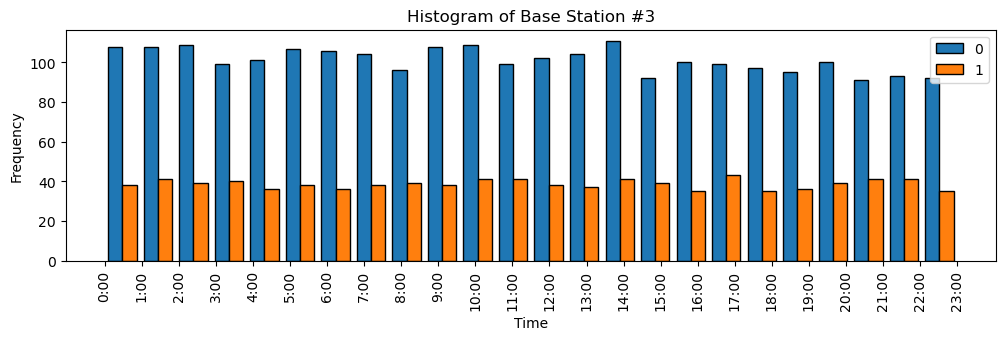

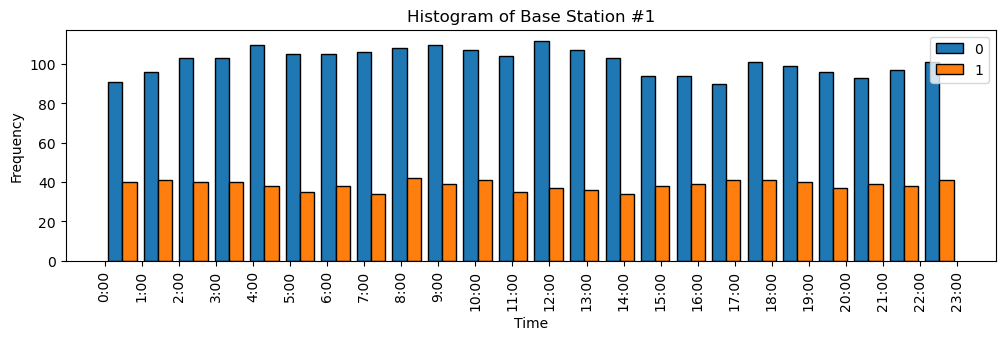

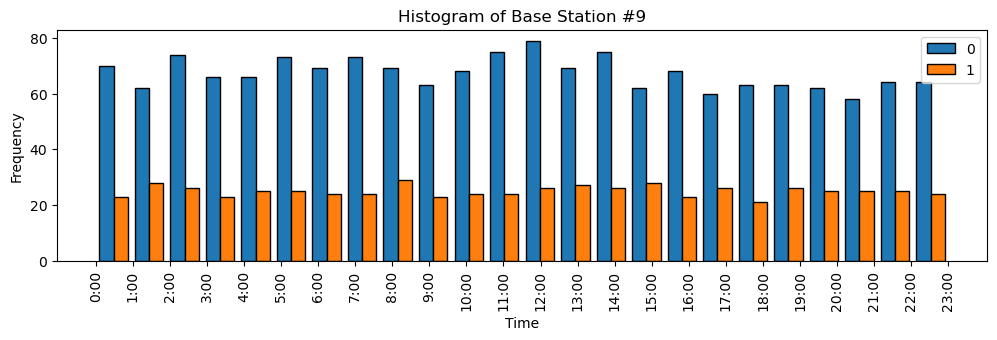

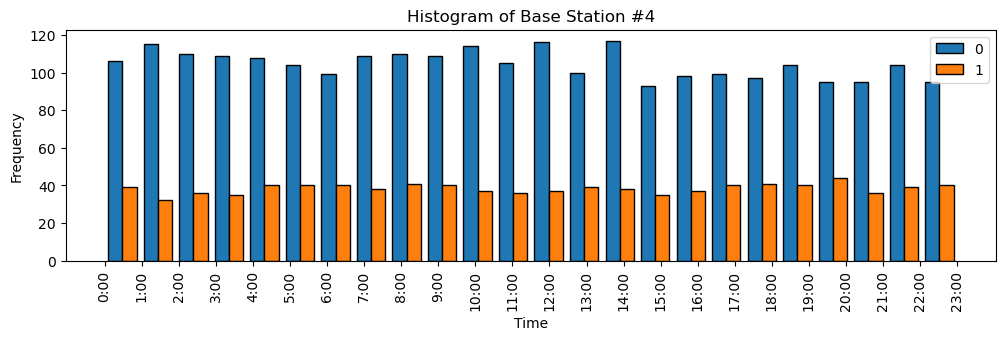

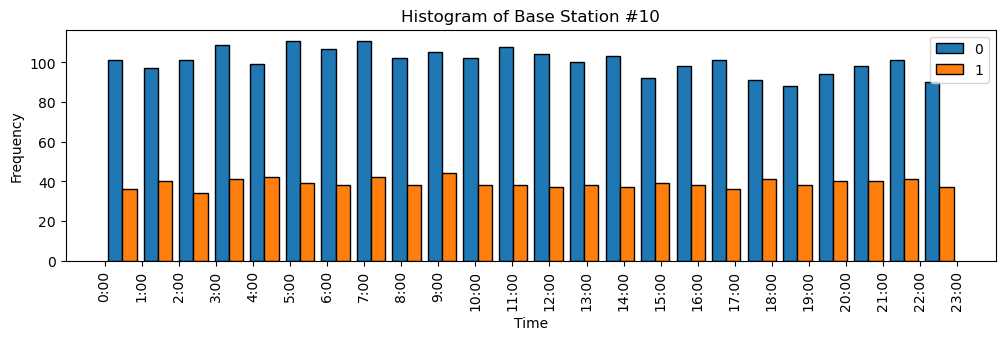

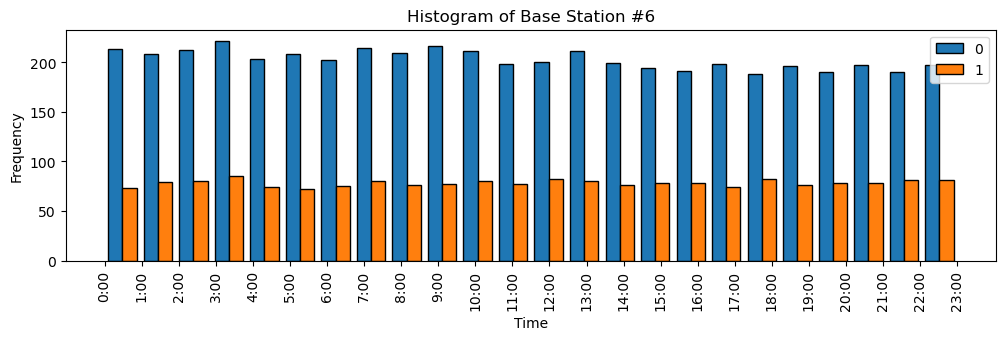

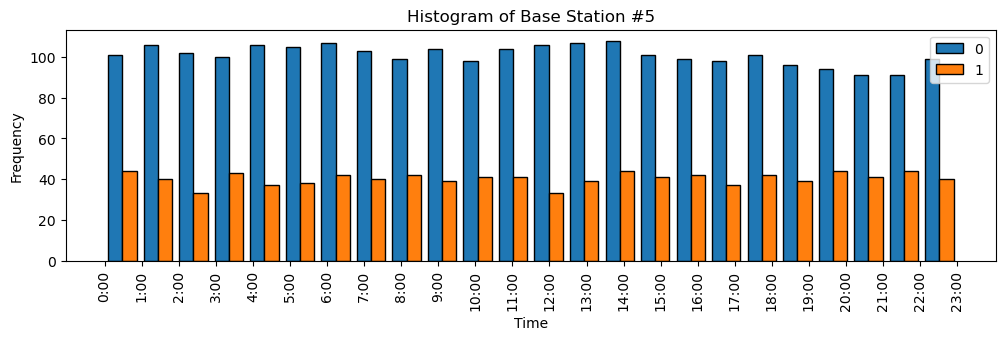

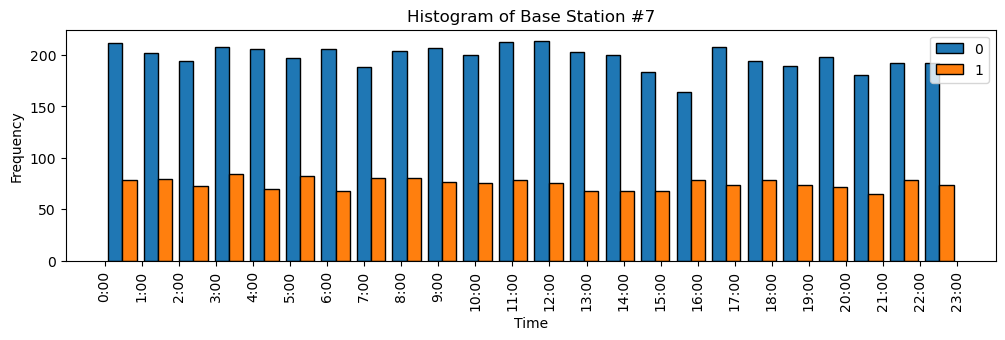

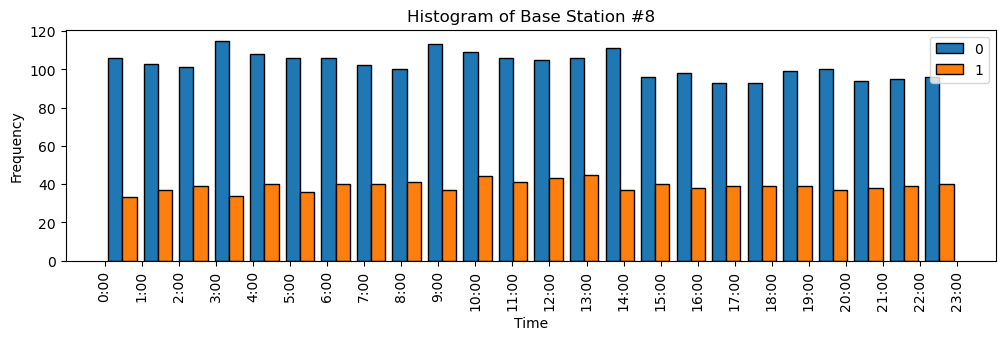

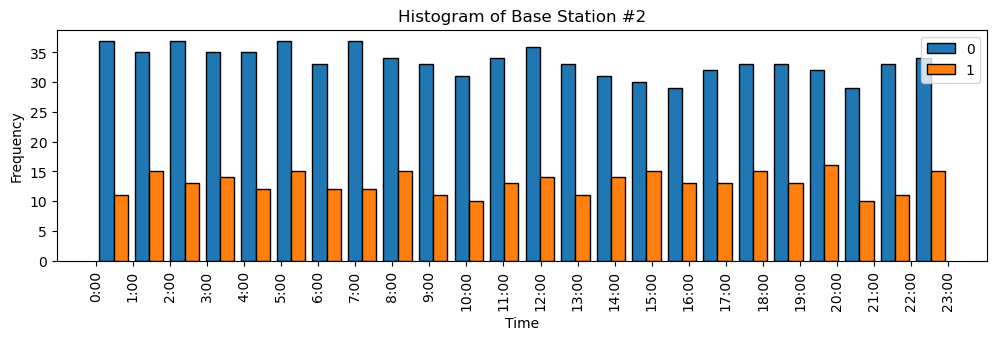

In [14]:
BSN_Unique = train_file.Base_Stn_No.unique()
for i in BSN_Unique:
    Time_Series_Plot(train_file, i)

We presume that the collected datas of each Base Stations are clean and fairly distributed. As we observe, the samples have almost consistent count so we can proceed with prediction of Unusual Behaviour.

##### Plotting the Time Series of each Cell ID.

In [15]:
def Time_Series_Plot_Cell(train_file, CellID):
    Time_1 = train_file[(train_file['Unusual'] == 1) & (train_file['Cell_ID'] == CellID)]['Time']
    Time_0 = train_file[(train_file['Unusual'] == 0) & (train_file['Cell_ID'] == CellID)]['Time']
    # Convert time strings to numerical values representing hours
    Time_1_hours = Time_1.apply(lambda x: int(x.split(':')[0]))
    Time_0_hours = Time_0.apply(lambda x: int(x.split(':')[0]))
    

    # Calculate the range of time values to create bins
    min_time = min(train_file['Time'])
    max_time = max(train_file['Time'])
    bins = 24  # Or adjust this value as per your requirement

    plt.figure(figsize=(12, 3))
    plt.hist([Time_0_hours, Time_1_hours], bins=bins, edgecolor='black', label=['0', '1'])

    # Specify the tick positions and labels
    tick_positions = list(range(0, 24))  # Assuming 24-hour format
    tick_labels = [f'{pos}:00' for pos in tick_positions]

    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Cell ID LTE - {CellID}')
    plt.xticks(tick_positions, tick_labels, rotation=90)
    
    return plt.legend()

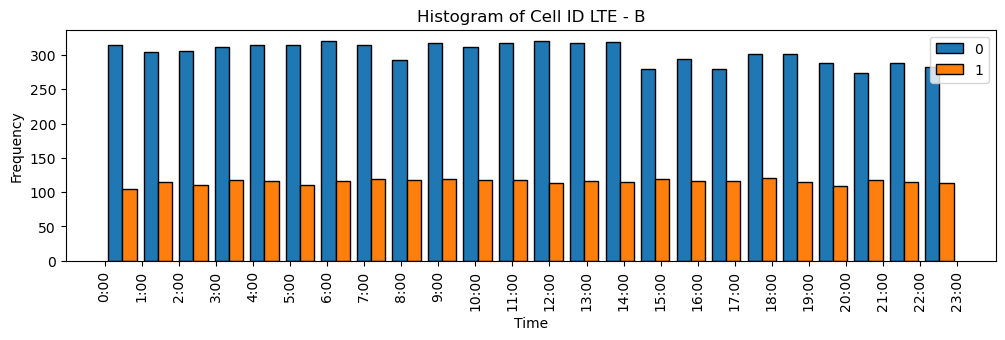

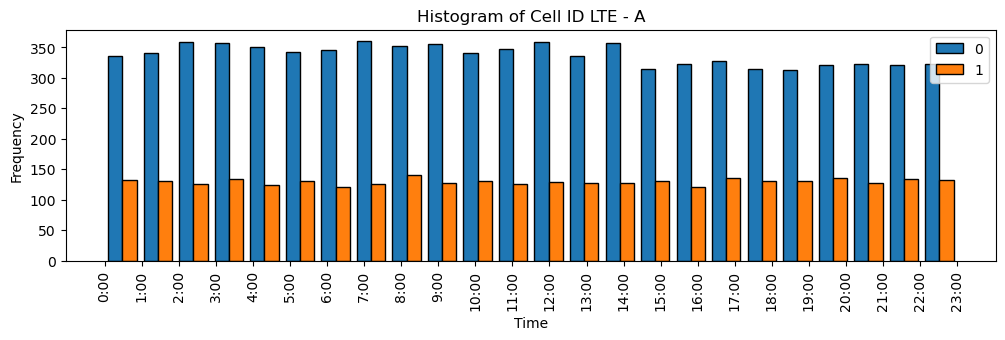

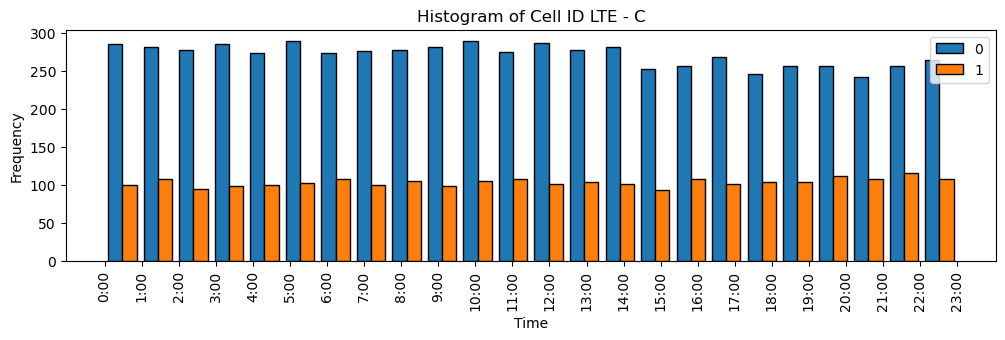

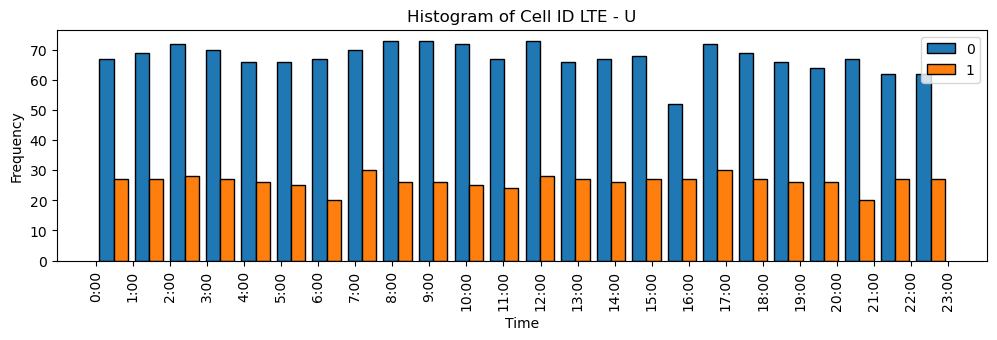

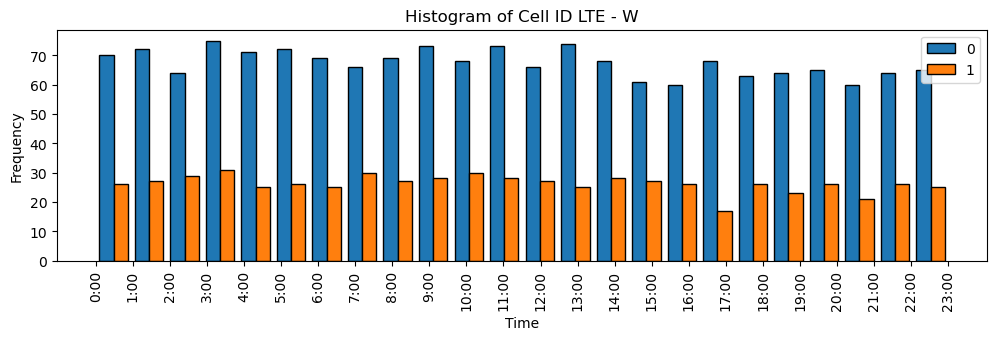

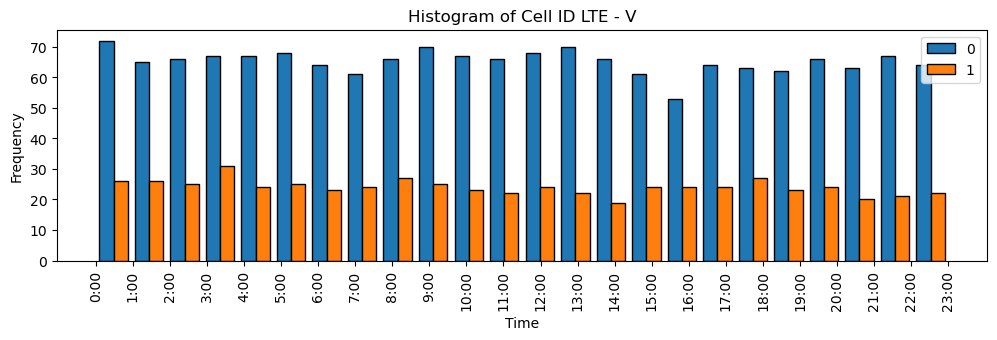

In [16]:
CellID = train_file.Cell_ID.unique()

for cell_id in CellID:
    Time_Series_Plot_Cell(train_file, cell_id)

#### Observations:
+ Upon investigating the frequency of CellID and Base Station ID with respect to Time Component, it clearly shows on how these categories are fairly distributed with respect to time. 
+ Thus, it suggest that we can confidently drop the categories and represent it as a whole in the machine learning.

In [17]:
cleaned_df = train_file.drop(["Time", "CellName", "Base_Stn_No", "Cell_ID"], axis=1)
cleaned_df.head(5)

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0


### Exploratory Data Analysis with continuous features

+ Let us explore the remaining continuous features.

In [18]:
cleaned_df.columns

Index(['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
       'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'maxUE_DL', 'maxUE_UL',
       'maxUE_UL+DL', 'Unusual'],
      dtype='object')

##### Distribution of each features

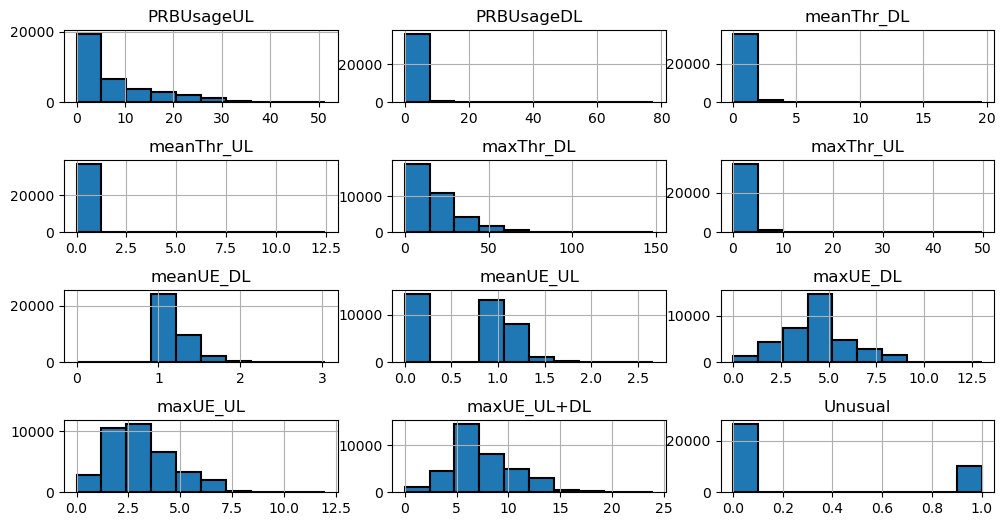

In [19]:
cleaned_df.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
plt.subplots_adjust(wspace=0.2, hspace=0.8)
fig.set_size_inches(12,6)
plt.show()

##### Distribution of each features with respect to Target by using Box Plot for comparison of distribution.

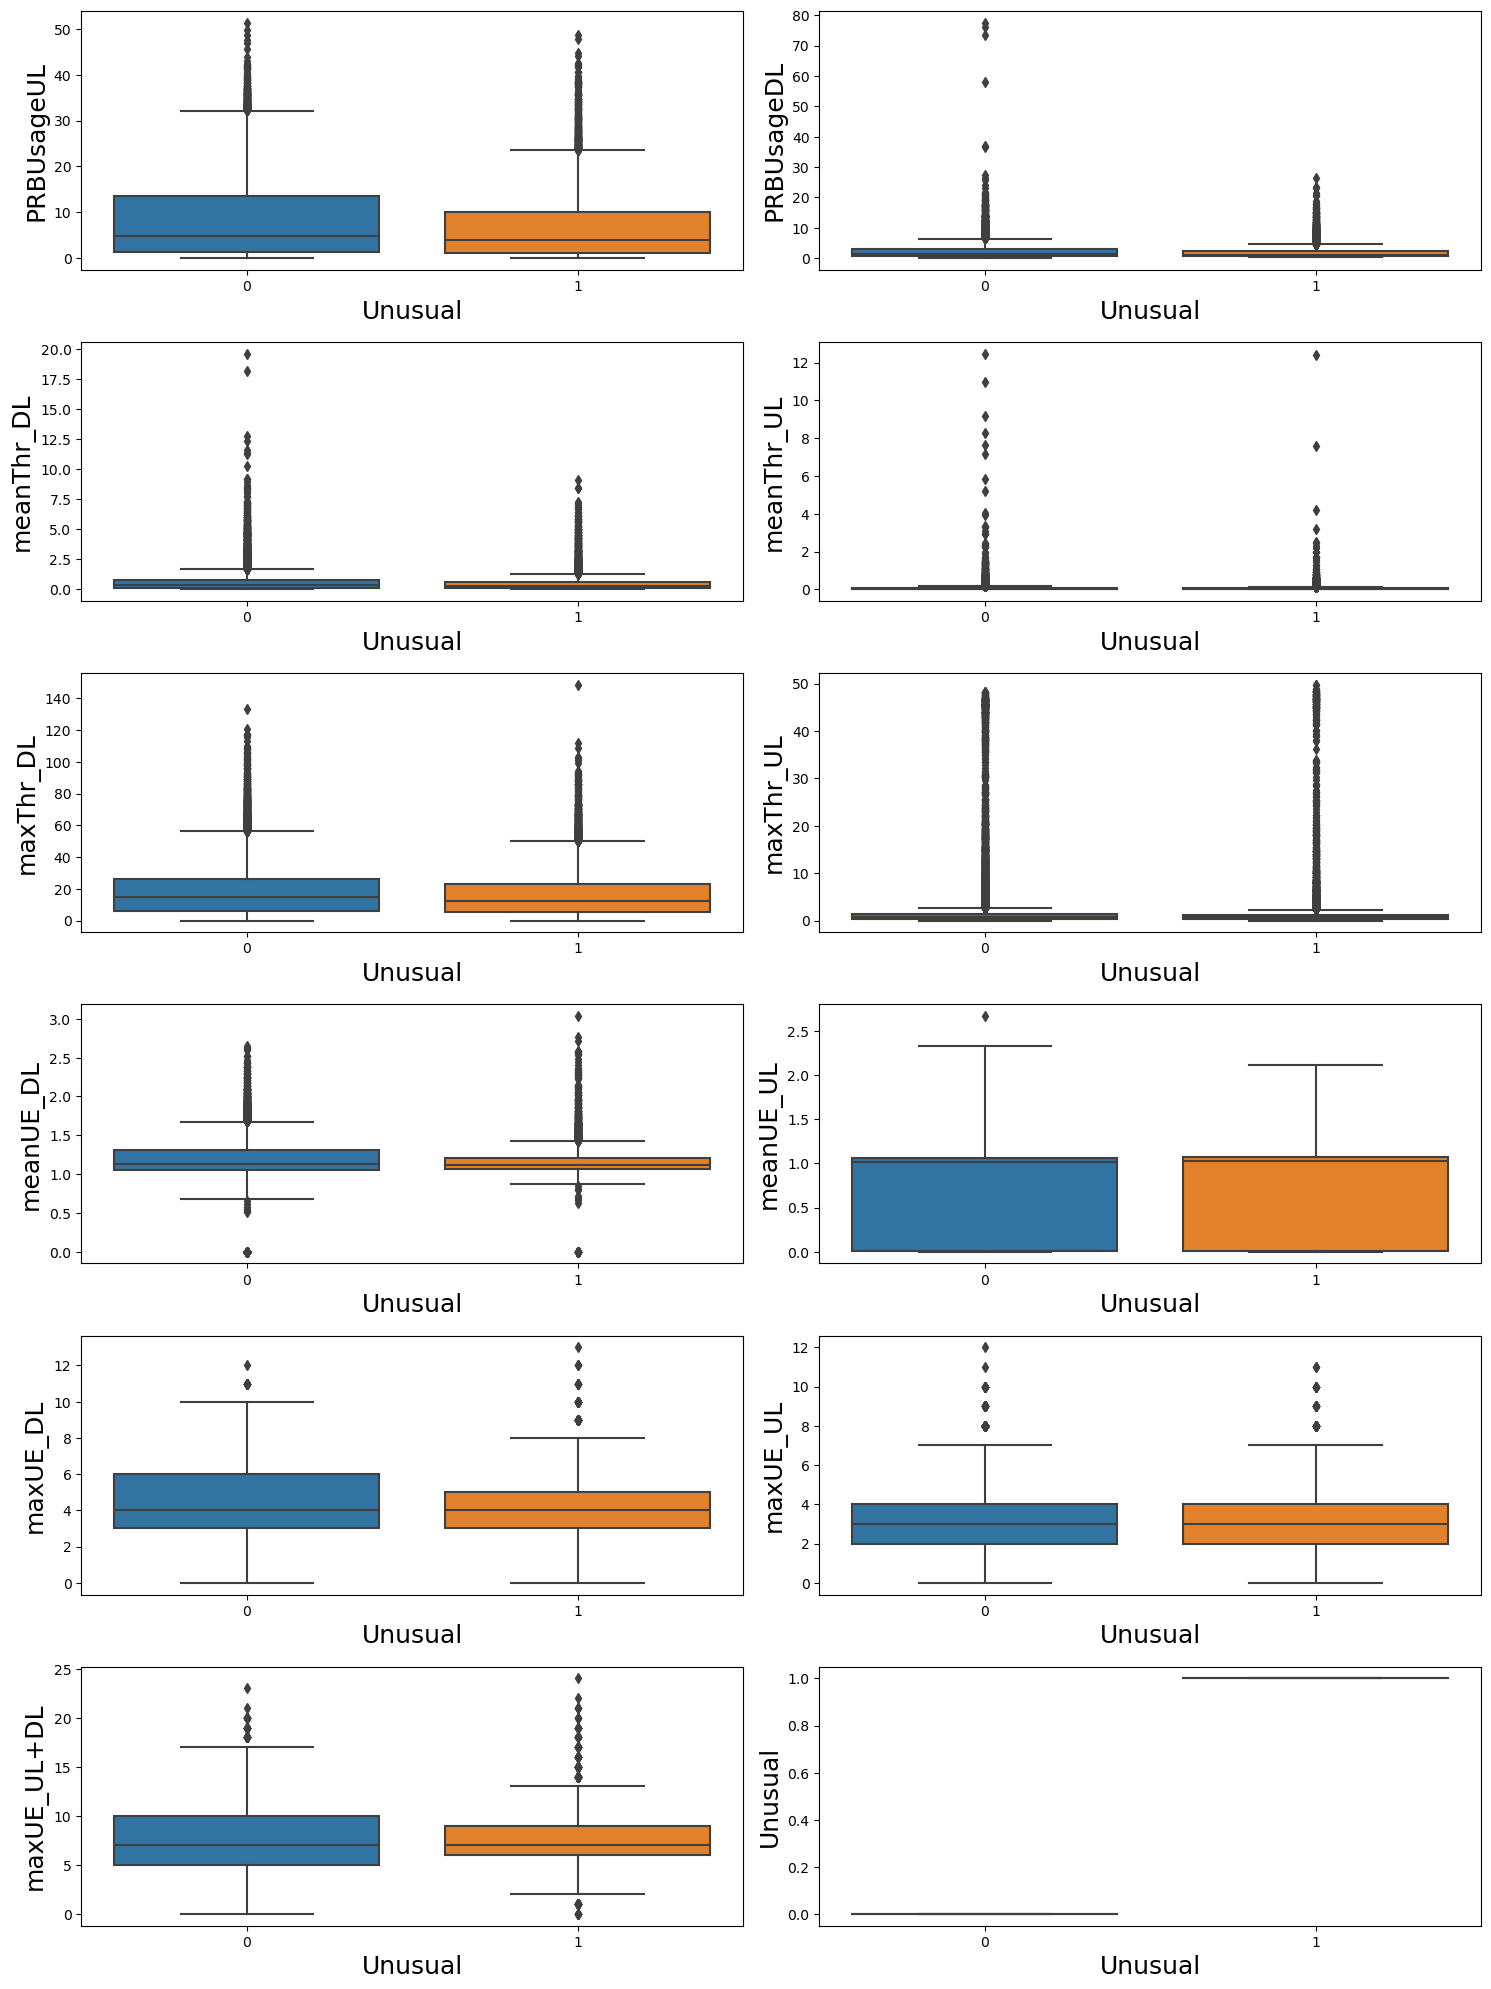

In [20]:
data = cleaned_df
columns = cleaned_df.columns
plt.figure(figsize=(15,20))
for i, column in enumerate(columns, start=1):
    ax = plt.subplot(6,2,i)
    sns.boxplot(x='Unusual', y=column, data=data)
    ax.set_xlabel("Unusual", fontsize=18)  
    ax.set_ylabel(column, fontsize=18)  

plt.tight_layout()
plt.show()

**Observations:**
+ Upon comparing the Unusual categories, It has almost the same distribution as reflected in majority fair distribution.

Lets dive in with correlation of each features.

### Correlation Analysis

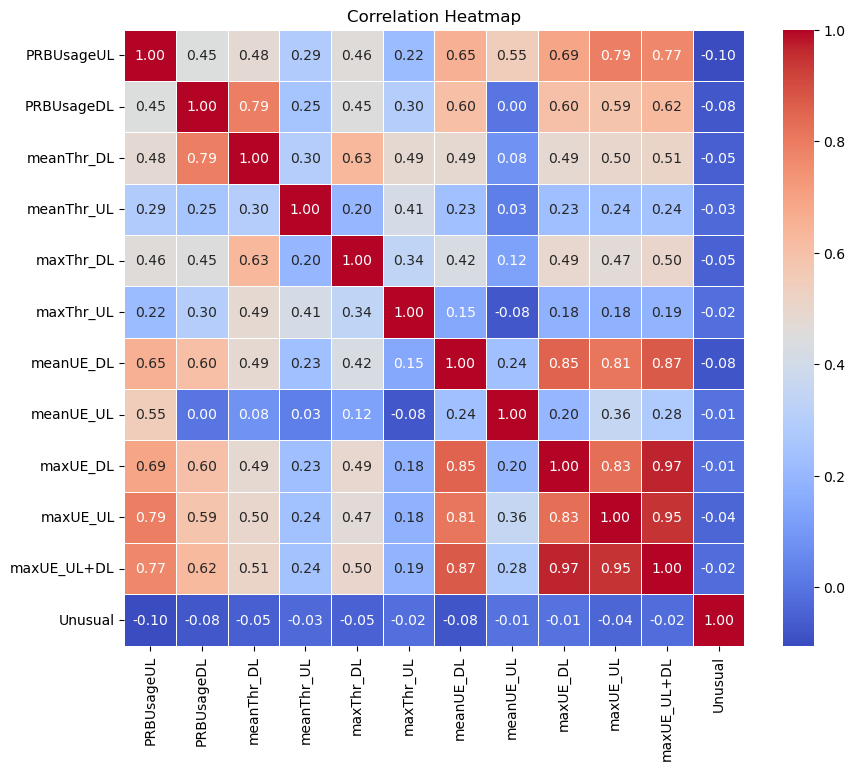

In [21]:
correlation_df = cleaned_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Observations:**
+ No correlations observed from the features with respect to Target variables.
+ PRBUsageDL with respect to meanThr_DL / meanUE_DL got a passing correlation.
+ PRBUsageUL with respect to maxUE_UL got highly correlated features.
+ Thus, this features have underlying patterns that we need to identify in the Feature selection process.

## Feature Selection

+ This is necessary step to consider for reduction of dimensions and eliminate the irrelevant features.
+ In this step, we can verify the correlation if they have a causality with target.

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
X = cleaned_df.drop('Unusual', axis=1) #Features
y = cleaned_df['Unusual'] #Target

Select the top 3 features:

In [27]:
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X,y)

Create Dataframe for the features and the score of each features:

In [28]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

Finally, we'll combine all the features and their corresponding scores in one data frame:

In [29]:
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.sort_values(by = 'Score')

,Feature,Score
7,meanUE_UL,0.893772
8,maxUE_DL,2.444851
6,meanUE_DL,9.720216
3,meanThr_UL,17.300302
10,maxUE_UL+DL,23.482600
9,maxUE_UL,31.826107
2,meanThr_DL,103.272135
5,maxThr_UL,119.597117
1,PRBUsageDL,521.584892
4,maxThr_DL,1269.033330


Here, we notice that the top 3 features that are most related to the target output are:
+ **'PRBUsageUL'** -level of resource utilization Download in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes.

+ **'maxThr_DL'** - maximum Download carried traffic (in Mbps) measured in the last 15 minutes.
+ **'PRBUsageDL'** - level of resource utilization Upload in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes.

### Scatter plot of Top 3 Feature Selected.

In [30]:
selected_clean_df = cleaned_df[['PRBUsageUL', 'maxThr_DL', 
                                'PRBUsageDL', 'Unusual']]

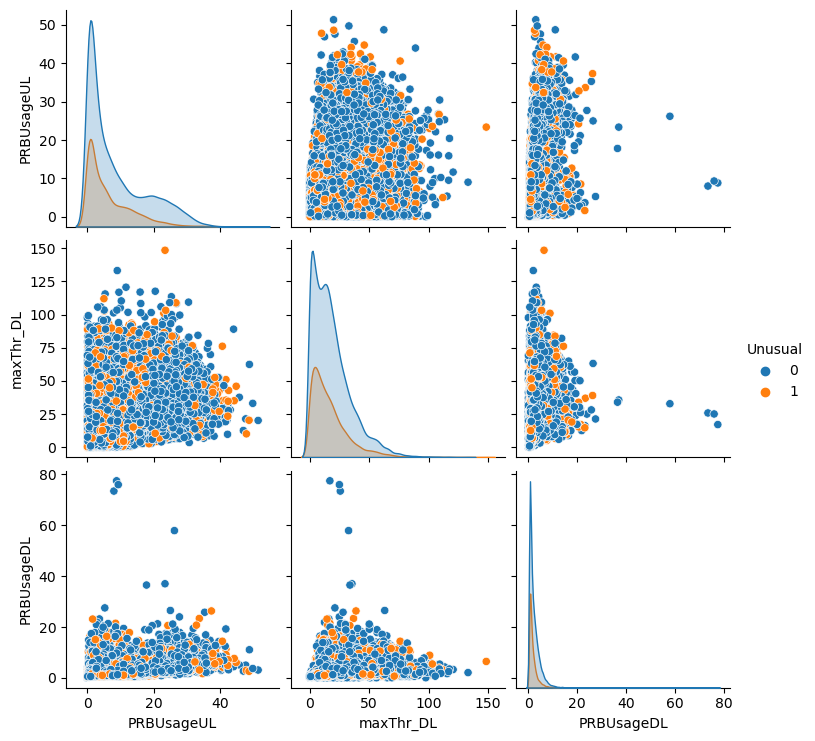

In [31]:
sns.pairplot(selected_clean_df, hue='Unusual');

## Machine Learning Model

Load the Test File.

In [33]:
test_file = pd.read_csv('ML-MATT-CompetitionQT2021_test.csv', delimiter=";")
test_file.head(5)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.8177,1.5251,0.5829,0.0445,23.1688,0.7669,1.0262,0.0100,3,3,6
1,20:30,6ULTE,2.0210,3.3350,0.5690,0.0750,29.2650,1.0490,1.3140,0.0100,6,3,9
2,11:30,2ALTE,0.5050,0.4040,0.0140,0.0100,0.2270,0.0970,1.0110,0.0100,2,1,3
3,6:45,3CLTE,1.0110,0.5050,0.2380,0.0210,20.9620,0.6090,1.0110,1.0110,2,1,3
4,15:45,6CLTE,4.0269,0.5104,0.0807,0.0414,3.9317,1.7811,1.0575,0.0107,3,2,5


##### Upon inspection of test file, it doesn't have a Target column. Thus, we will split our Train file to validate our machine learning model precision and accuracy score.

In [47]:
X = selected_clean_df.drop(['Unusual'], axis=1).values #Trained Features
y = selected_clean_df['Unusual'].values #Train Targets

##### Split the Train file.

In [36]:
from sklearn.model_selection import train_test_split
# Split the train file into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Define our regressor to evaluate the performance.

In [63]:
from sklearn import metrics
from sklearn.metrics import classification_report
def evaluate_classification_regression(regressor, X_train, y_train, X_val, y_val):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    
    score_train = regressor.score(X_train, y_train)
    score_val = regressor.score(X_val, y_pred)
    
    accuracy = metrics.accuracy_score(y_val, y_pred)
    recall = metrics.recall_score(y_val, y_pred)
    precision = metrics.precision_score(y_val, y_pred)
    f1 = metrics.f1_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    
    return score_train, score_val, accuracy, recall, precision, f1, report

#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(n_estimators = 50)
score_train, score_val, accuracy, recall, precision, f1, report = evaluate_classification_regression(ran_for, X_train, y_train, X_val, y_val)

print(f"Training set score: {score_train:.2f}")
print(f"Validation set score: {score_val:.2f}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"f1: {f1}")
print(report)

Training set score: 1.00
Validation set score: 1.00
Accuracy: 0.890529738517816
Recall: 0.6363636363636364
Precision: 0.9531478770131772
f1: 0.7631887456037515
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5335
           1       0.95      0.64      0.76      2046

    accuracy                           0.89      7381
   macro avg       0.91      0.81      0.85      7381
weighted avg       0.90      0.89      0.88      7381



#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
score_train, score_val, accuracy, recall, precision, f1, report = evaluate_classification_regression(log_reg, X_train, y_train, X_val, y_val)

print(f"Training set score: {score_train:.2f}")
print(f"Validation set score: {score_val:.2f}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"f1: {f1}")
print(report)

Training set score: 0.72
Validation set score: 1.00
Accuracy: 0.7228017883755589
Recall: 0.0
Precision: 0.0
f1: 0.0
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      5335
           1       0.00      0.00      0.00      2046

    accuracy                           0.72      7381
   macro avg       0.36      0.50      0.42      7381
weighted avg       0.52      0.72      0.61      7381



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-scor

#### Logistic Regression classifier gives us an erroneous classifier.

Plot ROC AUC Curve

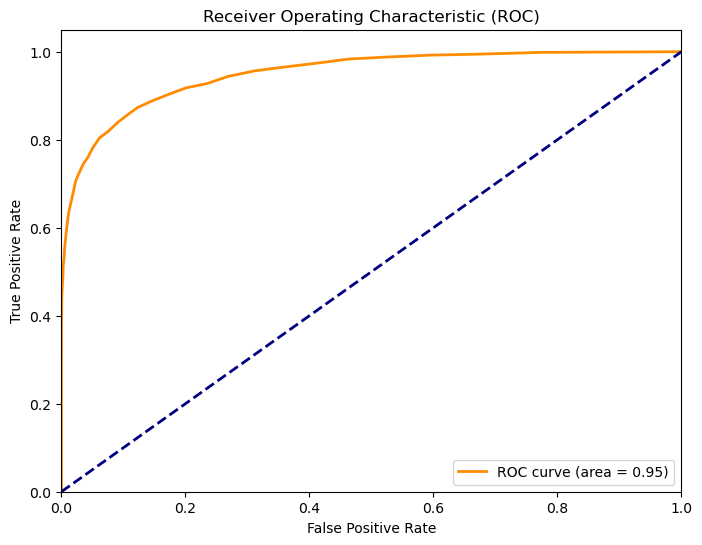

In [44]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities of positive class for validation set
y_prob = ran_for.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Plot the Confusion Matrix

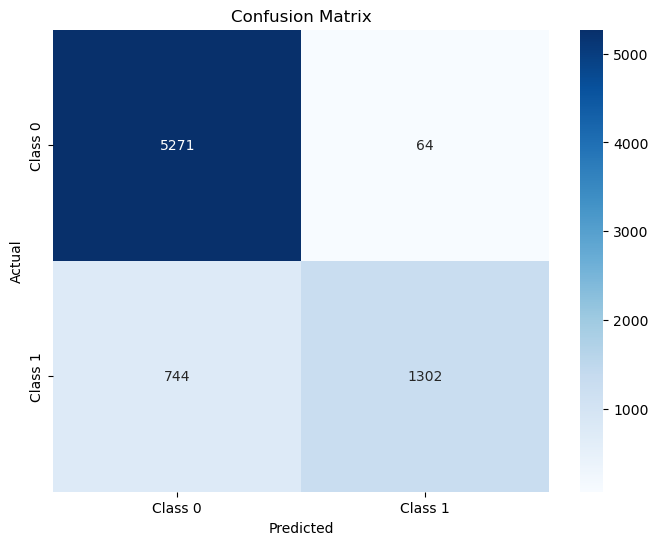

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = ran_for.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Observation:**
+ This outcome can have a selective bias when detecting Unusual Network Behaviour.  
+ We need to find another options beside of Feature Selection
+ Let's dive in with Class Balancing.

#### Class Balancing using SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame if needed
resampled_df = pd.DataFrame(X_resampled, columns=selected_clean_df.drop(['Unusual'], axis=1).columns)
resampled_df['Unusual'] = y_resampled

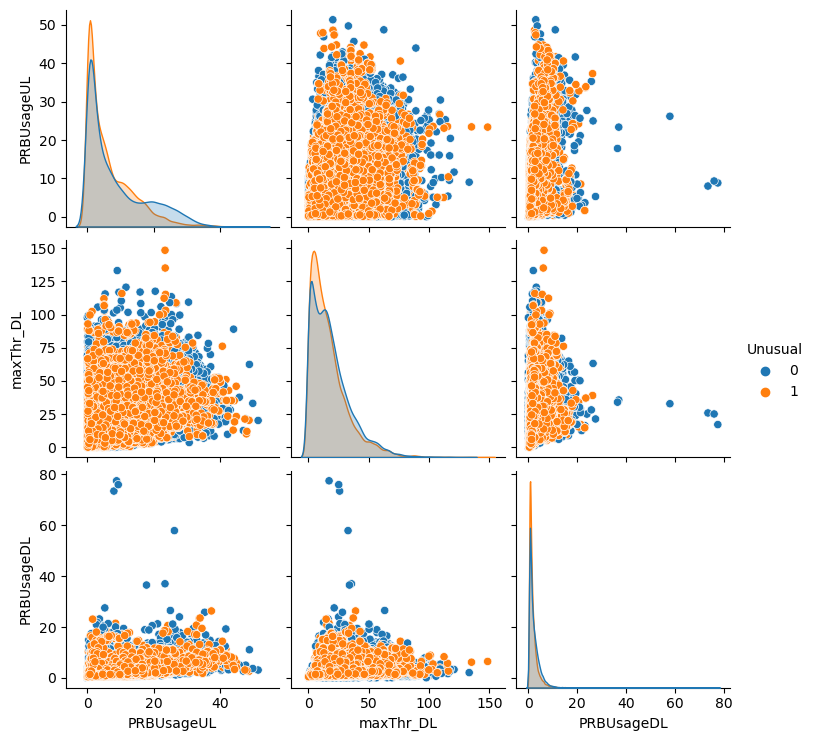

In [57]:
sns.pairplot(resampled_df, hue='Unusual');

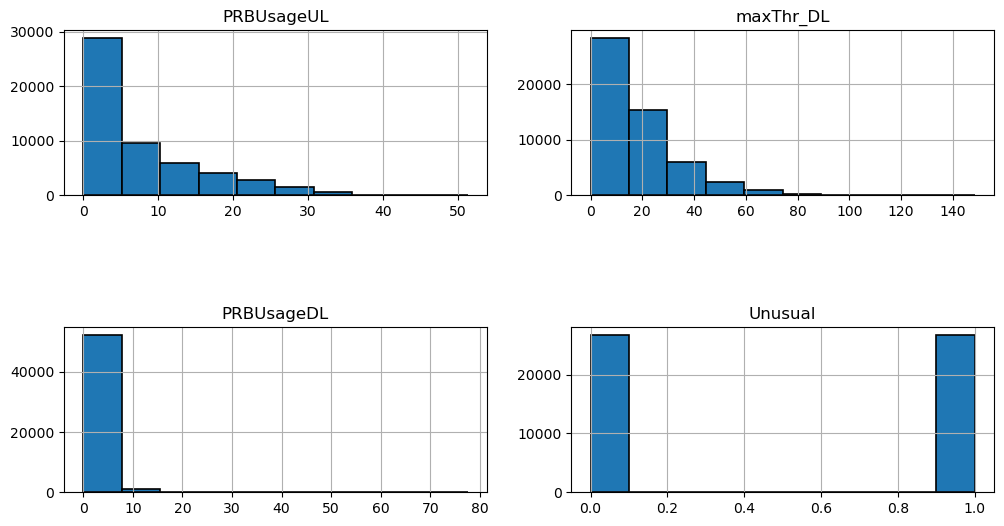

In [59]:
resampled_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
plt.subplots_adjust(wspace=0.2, hspace=0.8)
fig.set_size_inches(12,6)
plt.show()

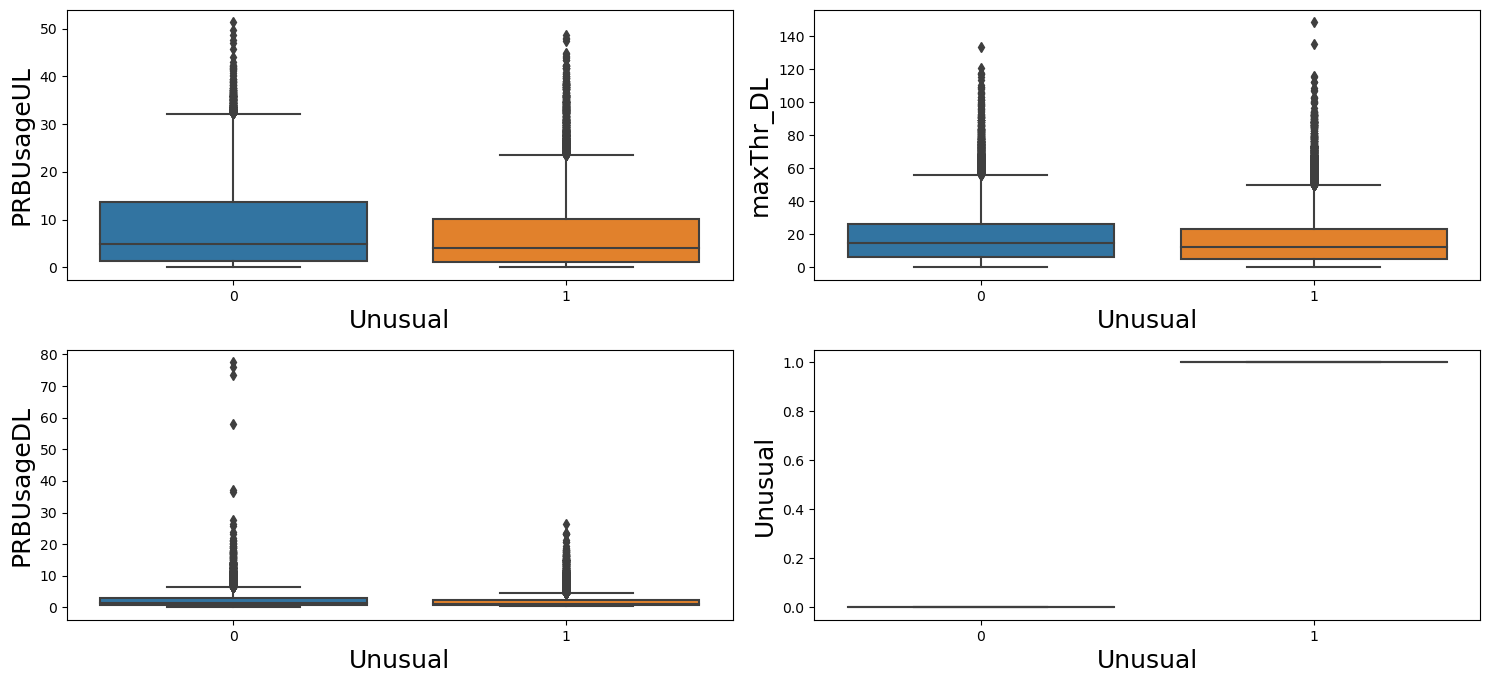

In [58]:
data = resampled_df
columns = resampled_df.columns
plt.figure(figsize=(15,20))
for i, column in enumerate(columns, start=1):
    ax = plt.subplot(6,2,i)
    sns.boxplot(x='Unusual', y=column, data=data)
    ax.set_xlabel("Unusual", fontsize=18)  
    ax.set_ylabel(column, fontsize=18)  

plt.tight_layout()
plt.show()

In [60]:
X_over = resampled_df.drop(['Unusual'], axis=1).values #Trained Features
y_over = resampled_df['Unusual'].values #Train Targets

In [61]:
X_train_over, X_val_over, y_train_over, y_val_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [64]:
ran_for = RandomForestClassifier(n_estimators = 50)
score_train, score_val, accuracy, recall, precision, f1, report = evaluate_classification_regression(ran_for, X_train_over, y_train_over, X_val_over, y_val_over)

print(f"Training set score: {score_train:.2f}")
print(f"Validation set score: {score_val:.2f}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"f1: {f1}")
print(report)

Training set score: 1.00
Validation set score: 1.00
Accuracy: 0.9204789970998223
Recall: 0.9017471350742062
Precision: 0.9362200117027502
f1: 0.9186602870813397
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5366
           1       0.94      0.90      0.92      5323

    accuracy                           0.92     10689
   macro avg       0.92      0.92      0.92     10689
weighted avg       0.92      0.92      0.92     10689



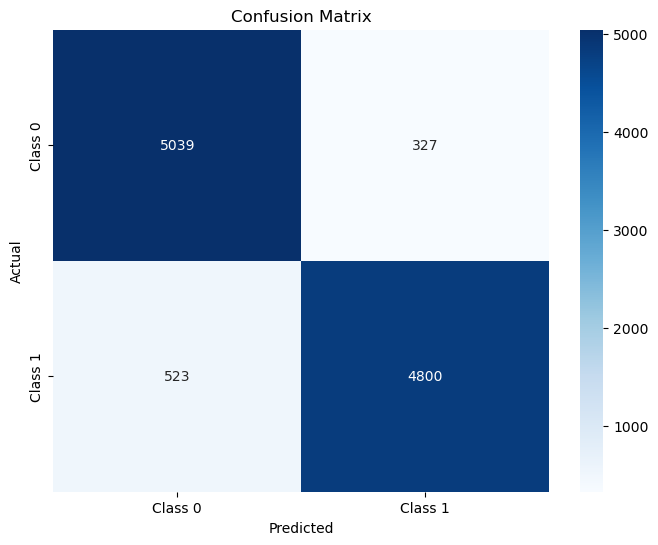

In [65]:
y_pred = ran_for.predict(X_val_over)
cm = confusion_matrix(y_val_over, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

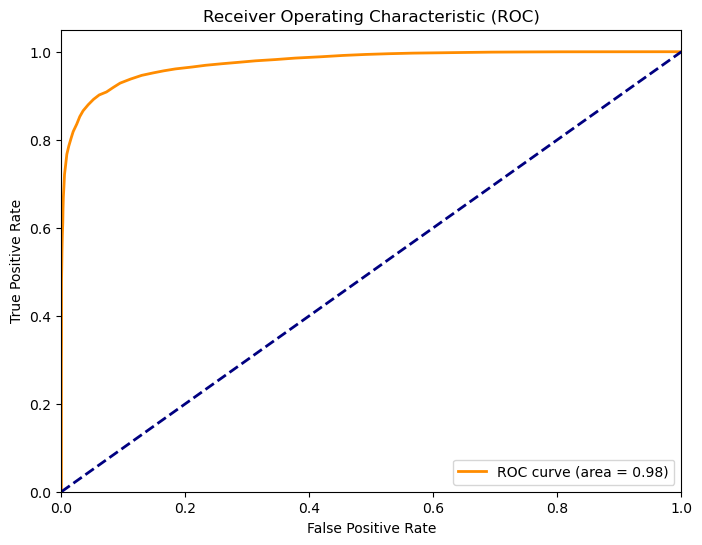

In [66]:
# Predict probabilities of positive class for validation set
y_prob = ran_for.predict_proba(X_val_over)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_val_over, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The AUC is 0.98, meaning that the model did a great job.

## Prescriptive Analytics

In [67]:
clean_test_file = test_file.drop(['Time', 'CellName', 'meanThr_DL', 
                                  'meanThr_UL', 'maxThr_UL', 'meanUE_DL',
                                 'meanUE_UL', 'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL'], axis=1)
clean_test_file.head(5)

,PRBUsageUL,PRBUsageDL,maxThr_DL
0,3.8177,1.5251,23.1688
1,2.0210,3.3350,29.2650
2,0.5050,0.4040,0.2270
3,1.0110,0.5050,20.9620
4,4.0269,0.5104,3.9317


In [68]:
# Predict probabilities of positive class for validation set
y_test_prob = ran_for.predict_proba(clean_test_file.values)[:,1]
y_test_bin = ran_for.predict(clean_test_file.values)
clean_test_file['Unusual_Probability'] = y_test_prob
clean_test_file['Unusual'] = y_test_bin

In [69]:
clean_test_file.describe()

,PRBUsageUL,PRBUsageDL,maxThr_DL,Unusual_Probability,Unusual
count,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000
mean,7.793731,2.078162,17.738425,0.396115,0.194475
std,8.425914,2.269438,16.037403,0.198682,0.395817
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.112000,0.707000,5.444550,0.260000,0.000000
50%,4.445800,1.314000,13.873800,0.360000,0.000000
75%,12.127575,2.728000,25.129000,0.460000,0.000000
max,46.887000,77.303000,118.269000,1.000000,1.000000


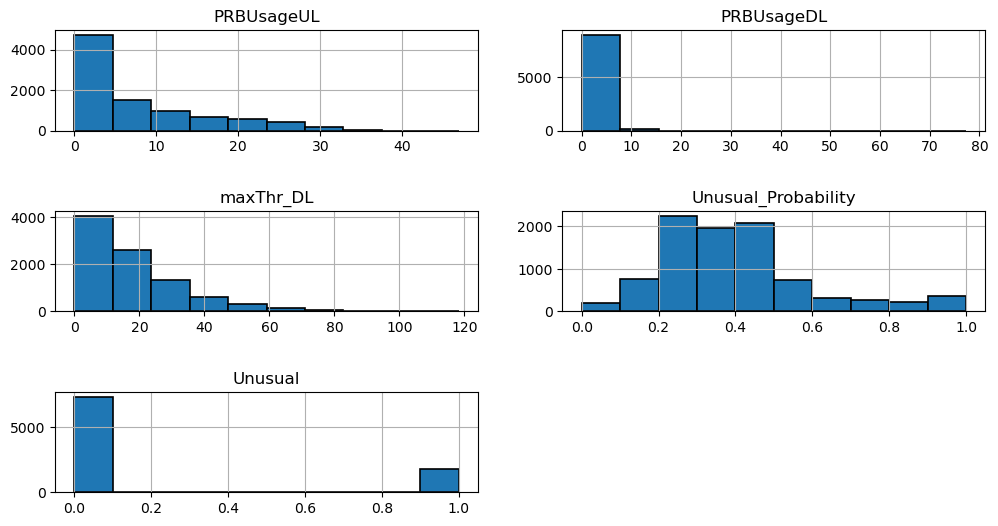

In [70]:
clean_test_file.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
plt.subplots_adjust(wspace=0.2, hspace=0.8)
fig.set_size_inches(12,6)
plt.show()

In [71]:
def plot_scatter_and_bar(clean_test_file, feature, n):
    # Plot bar graph
    lower = clean_test_file[feature].min()
    high = clean_test_file[feature].max()
    bins = np.arange(lower, high, (high-lower)/(n+1))  
    clean_test_file['PRB_bin'] = pd.cut(clean_test_file[feature], bins=bins)
    bin_means = clean_test_file.groupby('PRB_bin')['Unusual_Probability'].mean()

    plt.bar(range(len(bin_means)), bin_means, align='center')
    plt.xlabel(f'{feature} Bins')
    plt.ylabel('Average Unusual Probability')
    plt.xticks(range(len(bin_means)), bin_means.index, rotation=45)
    plt.title(f'Average Unusual Probability by {feature} Bins')

    for i, value in enumerate(bin_means):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    
    plt.show()

    # Plot scatter plot
    fig, ax = plt.subplots()
    colors = clean_test_file['Unusual'].map({0: 'green', 1: 'red'})
    ax.scatter(clean_test_file[feature], clean_test_file['Unusual_Probability'], c=colors)
    ax.set_xlabel(feature)
    ax.set_ylabel("Predicted_Unusual")
    ax.set_title(f"{feature} vs Predicted_Unusual")
    fig.set_size_inches(10, 6)
    plt.show()

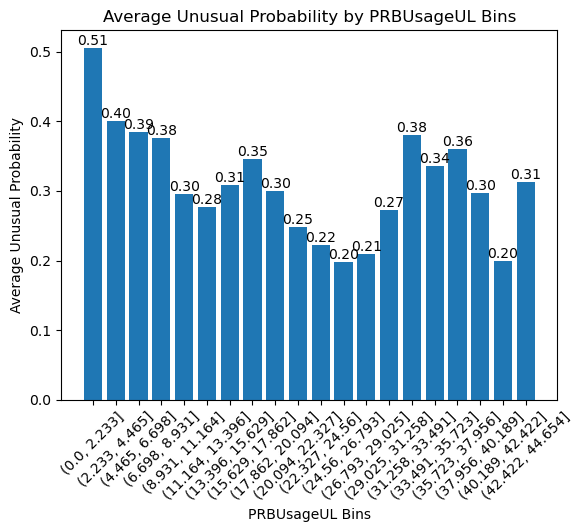

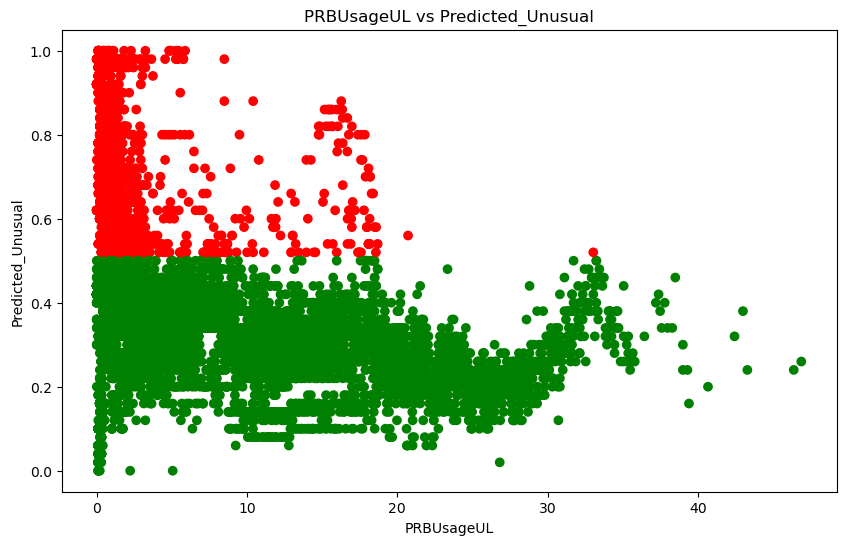

In [72]:
feature = 'PRBUsageUL'
n = 20
plot_scatter_and_bar(clean_test_file, feature, n)

**Conclusion:** 
+ There is 51% likelihood chance to have unusual behaviour of network if the level of resource utilization upload detected between 0 - 2.23% of any CellName.
+ Between 0 to 20% have indications of unusual network behavior.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


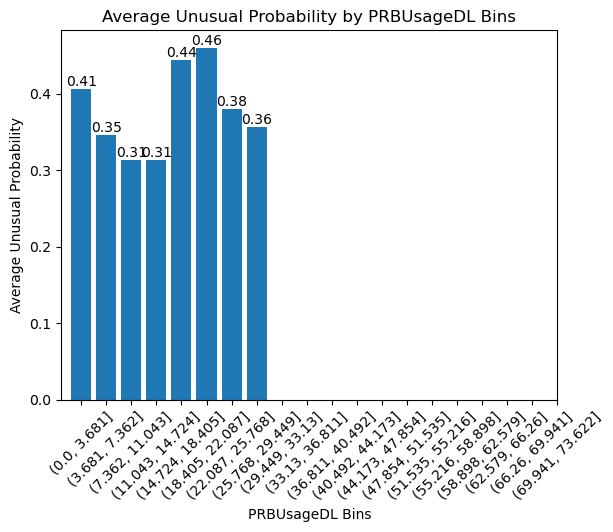

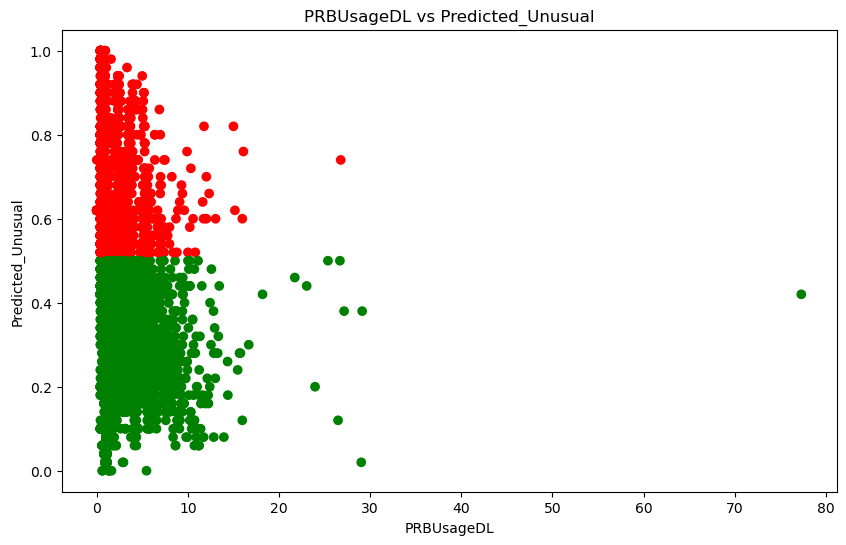

In [73]:
feature = 'PRBUsageDL'
n = 20
plot_scatter_and_bar(clean_test_file, feature, n)

**Conclusion:** 
+ There is 41% likelihood chance to have unusual behaviour of network if the level of resource utilization download detected between 0 - 3.68% of any CellName.
+ Between 0 to 20% have indications of unusual network behavior.

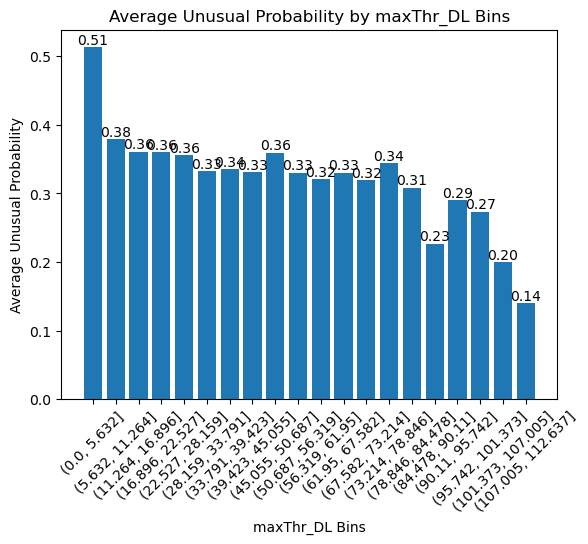

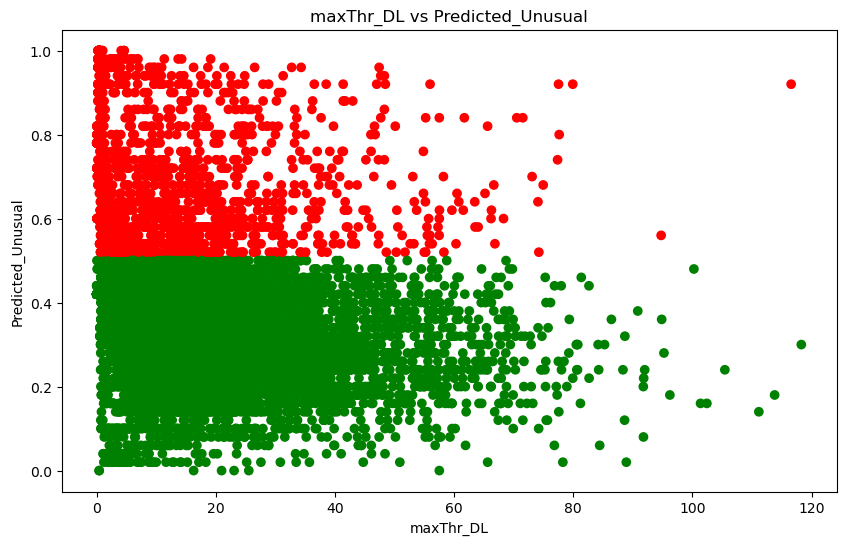

In [74]:
feature = 'maxThr_DL'
n = 20
plot_scatter_and_bar(clean_test_file, feature, n)

**Conclusion:** 
+ There is 51% likelihood chance to have unusual behaviour of network if the maximum carried traffic downlink will detect between 0 - 5.6 MBPS of any CellName.
+ Between 0 to 80MBPS have indications of unusual network behavior.